In [20]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import re

def parse_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                print( "N: ", n)
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_core_count( filename ):
    out_dict = {}
    n_regex = re.compile( "C=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                print( "N: ", n)
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_frac( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    t_regex = re.compile( "Time CPU and GPU \(total time\): (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_imbalance( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    t_regex = re.compile( "Load imbalance: [+-]?\d+(?:\.\d+)?" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 0 ).split( ':' )[ 1 ].strip() )
                out_dict[ n ].append( time )
    return out_dict


N:  1000000000
N:  2000000000
N:  3000000000
N:  4000000000
N:  5000000000
{1000000000: [1.648479, 1.67644, 1.648134, 1.858499, 1.614204, 1.675532], 2000000000: [3.302317, 3.186133, 3.247264, 3.125404, 3.32394, 3.244102], 3000000000: [4.917774, 4.664787, 4.840819, 4.867389, 4.813148, 4.761134], 4000000000: [6.339725, 6.548195, 6.544226, 6.166334, 7.006205, 6.774142], 5000000000: [8.416452, 8.307911, 9.434832, 8.318536, 8.7026, 8.416097]}


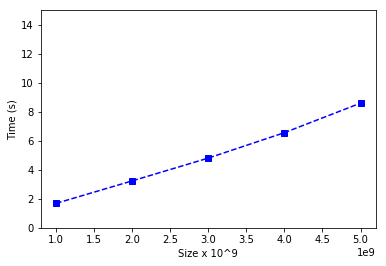

In [25]:
times = parse_runtime( 'outfile_2.tsv' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
ax.set_ylim( 0, 15 )
plt.suptitle( "")
plt.xlabel( "Size x 10^9")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 

N:  1
N:  2
N:  4
N:  8
N:  16
{1: [18.303793, 18.331407, 18.331028, 18.298071, 18.29694, 18.310826], 2: [9.50209, 9.423733, 9.466938, 9.356036, 9.393869, 9.318862], 4: [5.036041, 5.444924, 5.150116, 5.784407, 5.395327, 5.565976], 8: [2.838335, 2.823942, 2.72738, 2.813958, 2.941283, 2.775347], 16: [1.81365, 1.729895, 1.928719, 1.588934, 1.702559, 1.923143]}


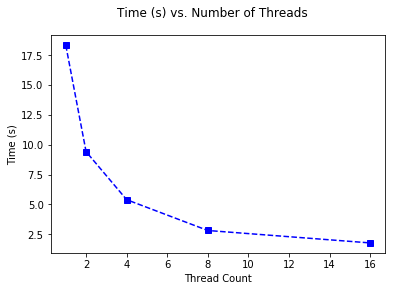

In [9]:
times = parse_core_count( 'outfile_scale.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 


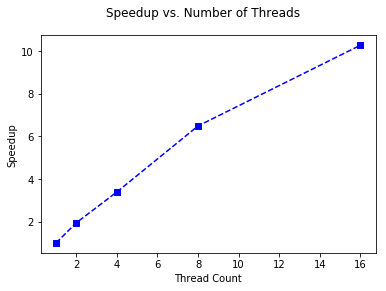

In [10]:
ax = plt.subplot()
t_0 = np.mean( times[ 1 ] )
x = list( times.keys() )
y = [ t_0 / np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Speedup vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Speedup")
ax.plot( x, y, "bs--" )

{0.0: [4.255237, 3.998292, 3.831167, 4.049007], 0.05: [3.414951, 3.971703, 3.685293], 0.1: [3.449885, 3.62951, 3.826969, 3.729008], 0.15: [3.74911, 3.830512, 3.730504, 3.505326], 0.2: [3.263455, 3.485457, 3.407743, 3.14011], 0.25: [3.178281, 3.531741, 3.389092, 2.954296], 0.3: [2.860827, 2.830336, 3.08298, 3.29434], 0.35: [2.665436, 2.782111, 3.010119, 2.997645], 0.4: [2.744983, 2.835474, 2.736945, 2.799252], 0.45: [2.590384, 2.820261, 2.604845, 2.843738], 0.5: [2.928316, 2.87164, 2.854, 2.878352], 0.55: [3.08784, 3.020556, 2.995549, 2.996593], 0.6: [3.245355, 3.066576, 3.246079, 3.18221], 0.65: [3.420428, 3.249259, 3.353585, 3.376441], 0.7: [3.726143, 3.586505, 3.900045, 3.515594], 0.75: [3.783229, 3.718542, 3.851761, 3.838796], 0.8: [4.052272, 4.028176, 4.172019, 3.915152], 0.85: [4.157992, 4.18159, 4.26433, 4.31692], 0.9: [4.464705, 4.592281, 4.363524, 4.305398], 0.95: [4.510847, 4.671768, 4.665907, 4.53312], 1.0: [4.76565, 4.801104, 4.983595, 4.974867]}


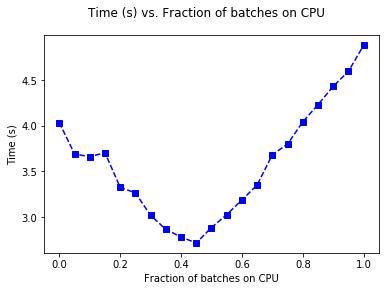

In [11]:
times = parse_cpu_frac( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Fraction of batches on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 

{0.0: [-0.987108, -0.99799, -0.987207, -0.997871], 0.05: [-0.888077, -0.890573, -0.877576], 0.1: [-0.788433, -0.80435, -0.819594, -0.817241], 0.15: [-0.739738, -0.742556, -0.739931, -0.724066], 0.2: [-0.607453, -0.642687, -0.645849, -0.617806], 0.25: [-0.50589, -0.570424, -0.516552, -0.483973], 0.3: [-0.407967, -0.336949, -0.409371, -0.422139], 0.35: [-0.233294, -0.266182, -0.310018, -0.294215], 0.4: [-0.089756, -0.122621, -0.096917, -0.160373], 0.45: [0.132699, -0.052577, 0.027209, -0.038115], 0.5: [0.121871, 0.064184, 0.16042, 0.207446], 0.55: [0.36181, 0.326982, 0.244721, 0.286568], 0.6: [0.351856, 0.40144, 0.380884, 0.361644], 0.65: [0.46233, 0.472807, 0.503035, 0.537676], 0.7: [0.65189, 0.607148, 0.670603, 0.604212], 0.75: [0.661194, 0.639425, 0.686301, 0.699308], 0.8: [0.759271, 0.721258, 0.765846, 0.717967], 0.85: [0.809034, 0.828669, 0.806754, 0.81963], 0.9: [0.884674, 0.863352, 0.866085, 0.856366], 0.95: [0.922934, 0.924652, 0.937679, 0.928263], 1.0: [4008615.375282, 3979039.7

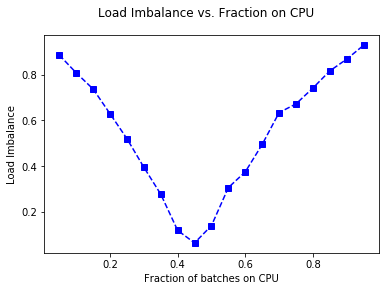

In [27]:
times = parse_cpu_imbalance( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )[ 1:-1 ]
y = [ np.mean( [ abs( item ) for item in times[ value ] ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Load Imbalance vs. Fraction on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Load Imbalance")
ax.plot( x, y, "bs--" )
print( times) 